<a href="https://colab.research.google.com/github/hllibrkaya/airbnb-nyc-visualization/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype


In [56]:
dataset = pd.read_csv("AB_NYC_2019.csv")

In [57]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [59]:
dataset["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [60]:
dataset["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<ipython-input-61-391e4166f996>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: title={'center': 'Correlation Matrix'}>

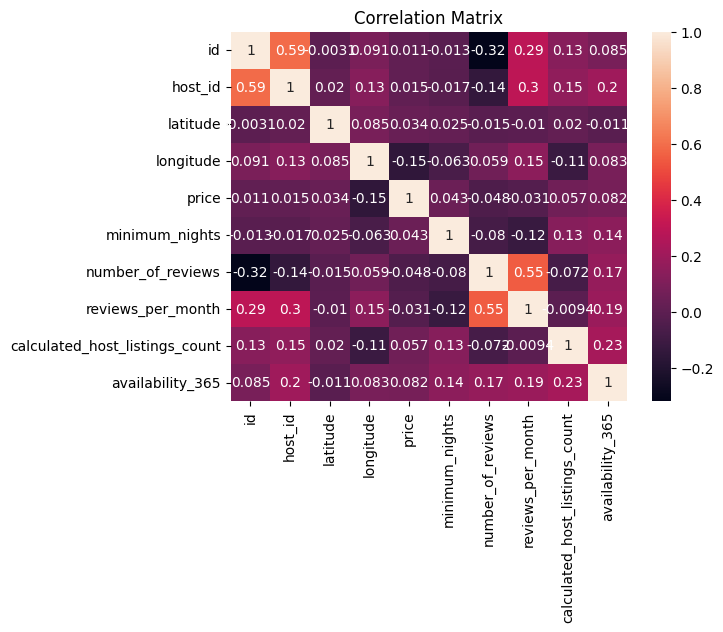

In [61]:
plt.title("Correlation Matrix")
sns.heatmap(dataset.corr(), annot=True)

Text(0, 0.5, 'Price')

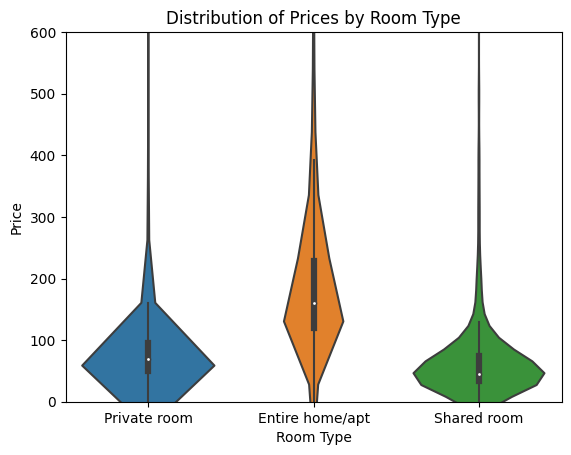

In [62]:
sns.violinplot(data= dataset, x="room_type", y="price").set_title("Distribution of Prices by Room Type")
plt.ylim(0,600)
plt.xlabel("Room Type")
plt.ylabel("Price")

Text(0.5, 0, 'Neighbourhood Groups')

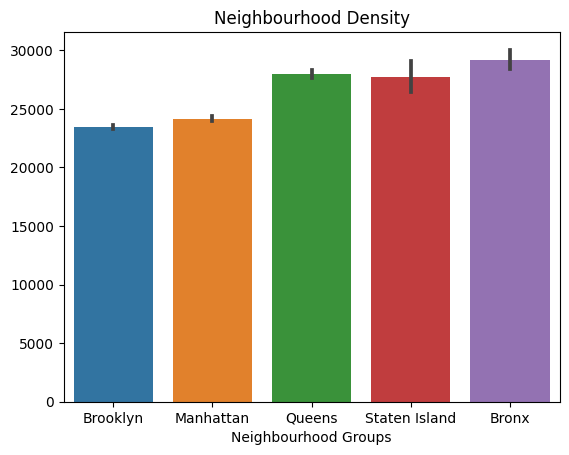

In [63]:
sns.barplot(x = "neighbourhood_group", y = dataset["neighbourhood_group"].index, data = dataset).set_title("Neighbourhood Density")
plt.xlabel("Neighbourhood Groups")

Text(0, 0.5, 'Price')

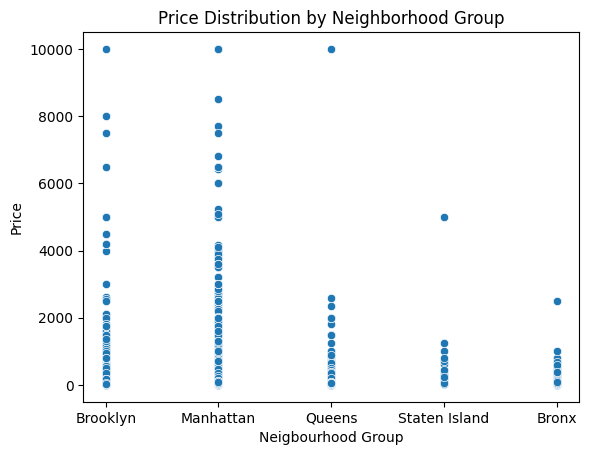

In [64]:
sns.scatterplot(data = dataset, x="neighbourhood_group", y="price").set_title("Price Distribution by Neighborhood Group")
plt.xlabel("Neigbourhood Group")
plt.ylabel("Price")

Text(37.722222222222214, 0.5, 'Price')

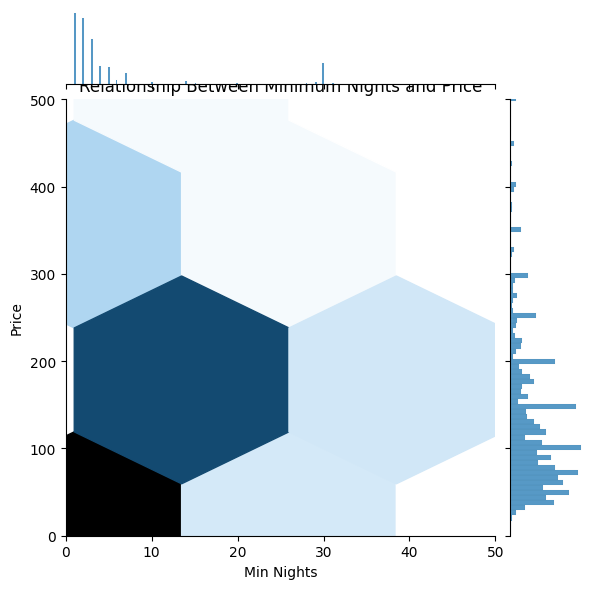

In [65]:
sns.jointplot(data = dataset, x="minimum_nights", y="price", kind="hex")
plt.ylim(0,500)
plt.xlim(0,50)
plt.title("Relationship Between Minimum Nights and Price")
plt.xlabel("Min Nights")
plt.ylabel("Price")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

Text(0.5, 28.999999999999986, 'Price')

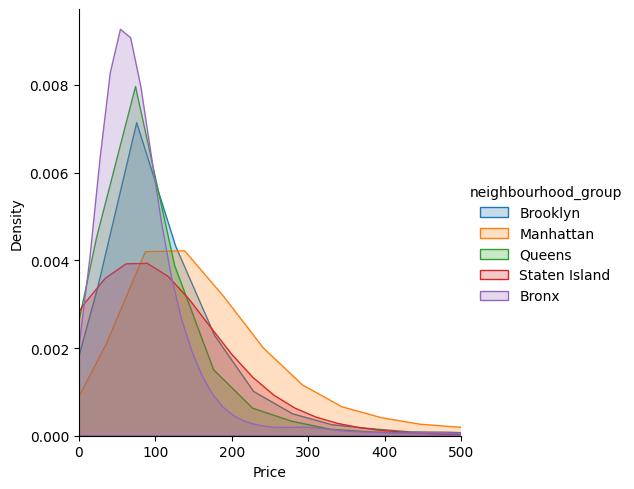

In [66]:
(sns.FacetGrid(dataset, hue="neighbourhood_group", height=5, xlim = (0,500)).map(sns.kdeplot,"price", shade=True).add_legend())
plt.xlabel("Price")

Text(0, 0.5, 'Price')

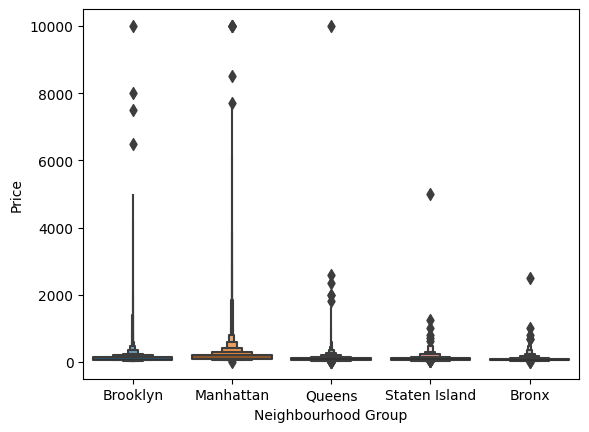

In [67]:
sns.boxenplot(data = dataset, x = "neighbourhood_group", y = "price")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")

Text(0.5, 1.0, 'Neighbourhood Groups')

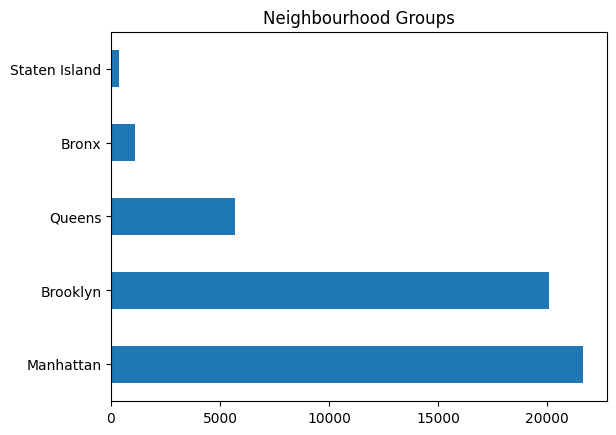

In [68]:
dataset["neighbourhood_group"].value_counts().plot.barh().set_title("Neighbourhood Groups")

Text(0, 0.5, 'Price')

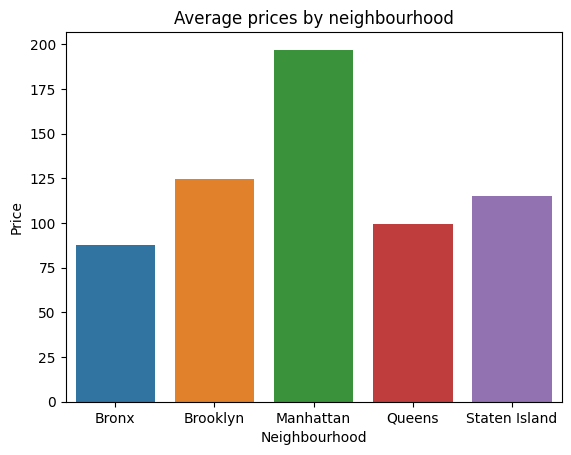

In [69]:
mean_prices = dataset.groupby("neighbourhood_group")["price"].mean().reset_index()
sns.barplot(data=mean_prices, x='neighbourhood_group', y='price').set_title("Average prices by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

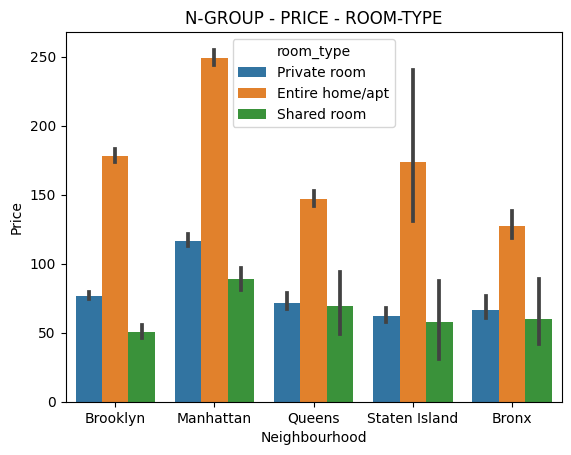

In [70]:
sns.barplot(x= "neighbourhood_group", y= "price", hue = "room_type", data = dataset).set_title("N-GROUP - PRICE - ROOM-TYPE")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")

<ipython-input-71-6a210424f123>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby("room_type").sum().plot.pie(y="price", autopct="%.2f%%", ylabel="", legend = True)


<Axes: >

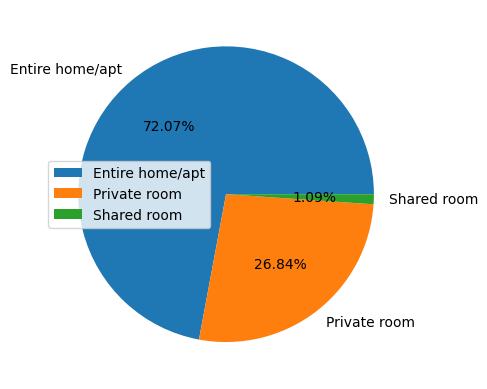

In [71]:
dataset.groupby("room_type").sum().plot.pie(y="price", autopct="%.2f%%", ylabel="", legend = True)

Text(-12.430555555555555, 0.5, 'Price')

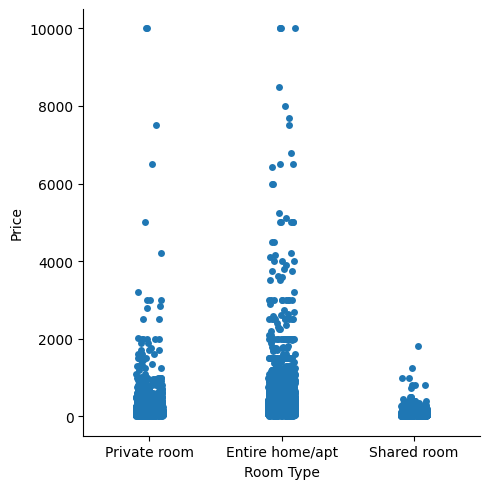

In [72]:
sns.catplot(x="room_type", y="price", data = dataset)
plt.xlabel("Room Type")
plt.ylabel("Price")

Text(51.909163194444446, 0.5, 'Price')

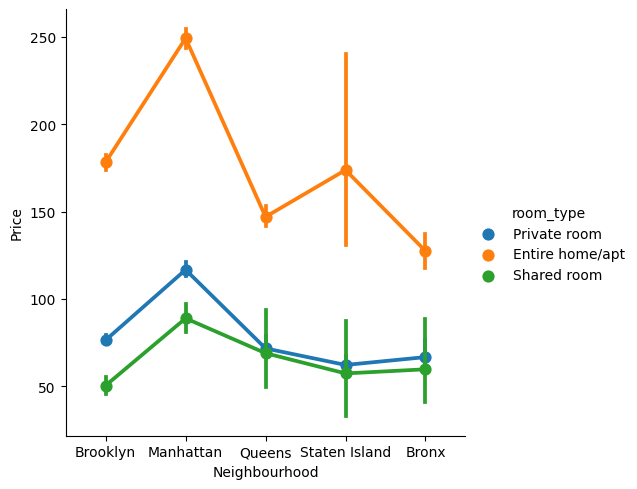

In [73]:
sns.catplot(x="neighbourhood_group", y="price", hue ="room_type", kind = "point", data = dataset )
plt.xlabel("Neighbourhood")
plt.ylabel("Price")

Text(0.5, 1.0, 'Price Count')

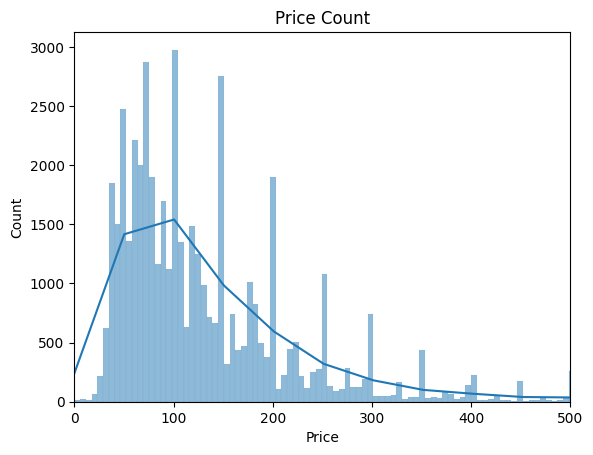

In [74]:
sns.histplot(dataset["price"], kde=True)
plt.xlim(0,500)
plt.xlabel("Price")
plt.title("Price Count")

<ipython-input-75-ae78d8033755>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset["price"], shade = True)


Text(0.5, 1.0, 'Price Density')

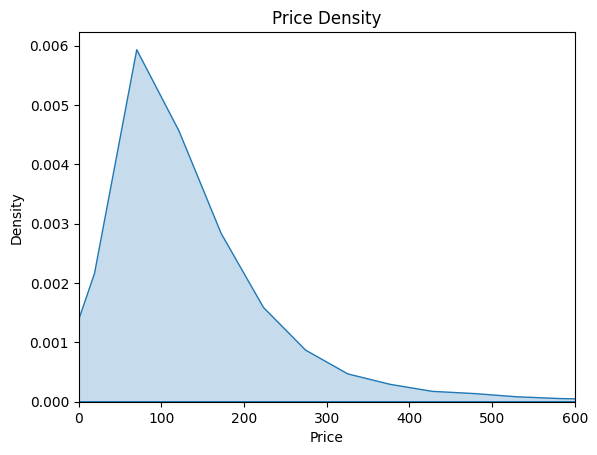

In [75]:
sns.kdeplot(dataset["price"], shade = True)
plt.xlim(0,600)
plt.xlabel("Price")
plt.title("Price Density")

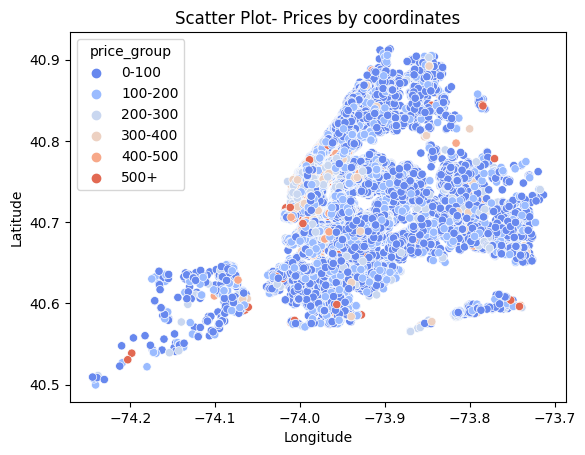

In [76]:
bins = [0, 100, 200, 300, 400, 500, float('inf')]
labels = ["0-100", "100-200", "200-300", "300-400", "400-500", "500+"]
dataset["price_group"] = pd.cut(dataset["price"], bins=bins, labels=labels, right=False)
sns.scatterplot(data=dataset, x="longitude", y="latitude", hue="price_group", palette="coolwarm").set_title("Scatter Plot- Prices by coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
dataset.drop("price_group", axis=1, inplace=True )

Text(0, 0.5, 'Price')

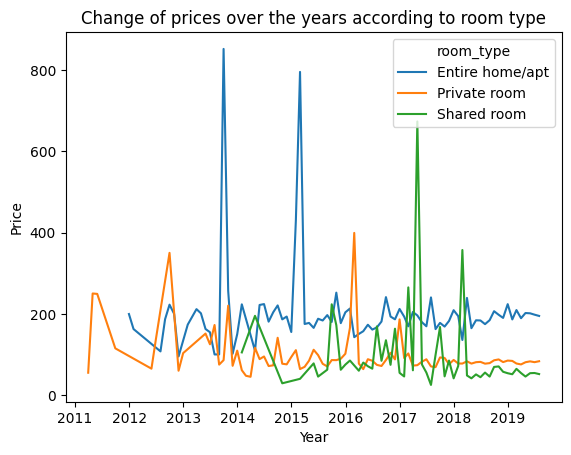

In [77]:
dataset["last_review"] = pd.to_datetime(dataset["last_review"])
dataset.set_index("last_review", inplace = True)
group = dataset.groupby(['room_type', pd.Grouper(freq='M')])['price'].mean().reset_index()
sns.lineplot(data = group, x="last_review", y="price", hue = "room_type").set_title("Change of prices over the years according to room type")
plt.xlabel("Year")
plt.ylabel("Price")